In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
analysis_df = pd.read_csv("sample_data/analysis_df.csv")
summary = pd.read_csv("sample_data/sentiment_summary.csv")

In [5]:
analysis_df.head(), summary.head()

(         date classification  sentiment_score  value  Closed PnL  Size USD  \
 0  2024-12-02  Extreme Greed                2     80         0.0   7872.16   
 1  2024-12-02  Extreme Greed                2     80         0.0    127.68   
 2  2024-12-02  Extreme Greed                2     80         0.0   1150.63   
 3  2024-12-02  Extreme Greed                2     80         0.0   1142.04   
 4  2024-12-02  Extreme Greed                2     80         0.0     69.75   
 
    profit  pnl_per_usd  
 0       0          0.0  
 1       0          0.0  
 2       0          0.0  
 3       0          0.0  
 4       0          0.0  ,
   classification  trades  profit_rate  avg_trade_size     avg_pnl  median_pnl  \
 0  Extreme Greed   10533     0.533086     7463.084632  150.996045     0.67308   
 1          Greed   17256     0.404149    12821.269269   88.545211     0.00000   
 2        Neutral   11099     0.469952    10699.058292   97.386743     0.00000   
 3           Fear   14528     0.429653 

In [6]:
sentiment_order = ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']

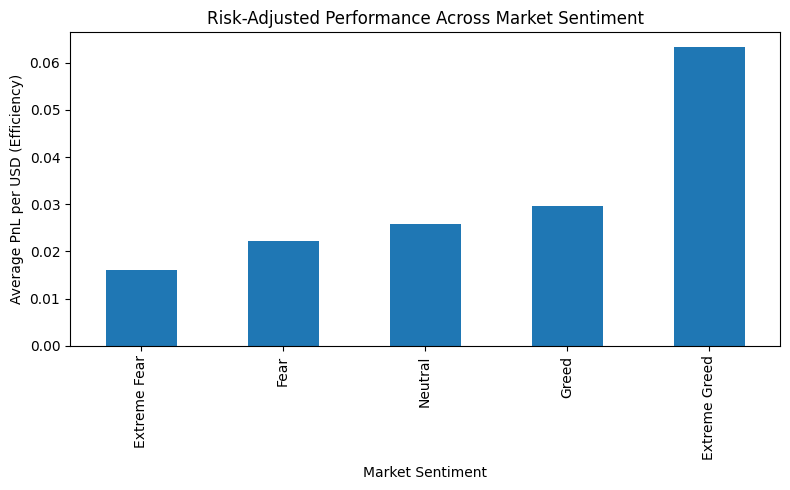

In [12]:
#Plot 1

efficiency = (analysis_df.groupby('classification')['pnl_per_usd'].mean().reindex(sentiment_order))

plt.figure(figsize=(8, 5))
efficiency.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL per USD (Efficiency)")
plt.title("Risk-Adjusted Performance Across Market Sentiment")
plt.tight_layout()

plt.savefig("drive/MyDrive/ds_anhad/outputs/efficiency_vs_sentiment.png")
plt.show()


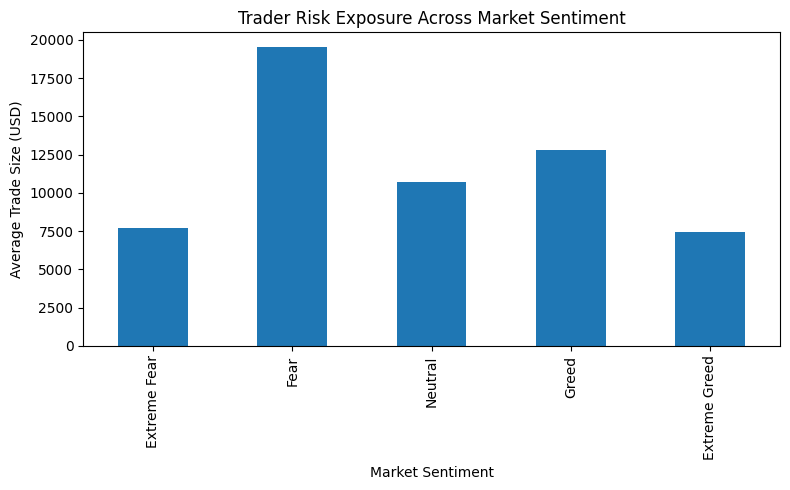

In [13]:
#Plot 2

trade_size = (
    analysis_df
    .groupby('classification')['Size USD']
    .mean()
    .reindex(sentiment_order)
)

plt.figure(figsize=(8, 5))
trade_size.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.title("Trader Risk Exposure Across Market Sentiment")
plt.tight_layout()

plt.savefig("drive/MyDrive/ds_anhad/outputs/trade_size_vs_sentiment.png")
plt.show()


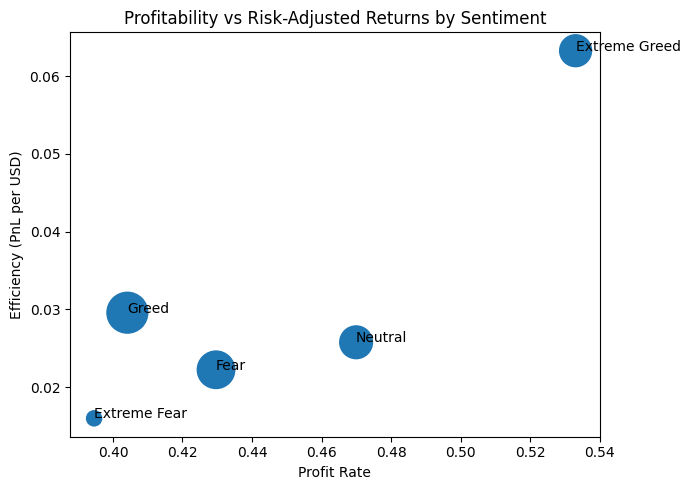

In [14]:
#Plot 3

summary_plot = summary.copy()

plt.figure(figsize=(7, 5))
plt.scatter(
    summary_plot['profit_rate'],
    summary_plot['efficiency'],
    s=summary_plot['trades'] / 20
)

for _, row in summary_plot.iterrows():
    plt.text(
        row['profit_rate'],
        row['efficiency'],
        row['classification']
    )

plt.xlabel("Profit Rate")
plt.ylabel("Efficiency (PnL per USD)")
plt.title("Profitability vs Risk-Adjusted Returns by Sentiment")
plt.tight_layout()

plt.savefig("drive/MyDrive/ds_anhad/outputs/profit_vs_efficiency.png")
plt.show()

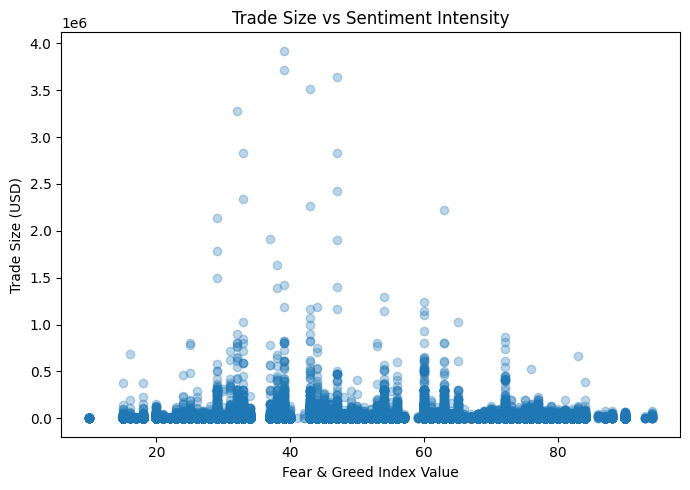

In [15]:
#Plot 4

plt.figure(figsize=(7, 5))
plt.scatter(
    analysis_df['value'],
    analysis_df['Size USD'],
    alpha=0.3
)

plt.xlabel("Fear & Greed Index Value")
plt.ylabel("Trade Size (USD)")
plt.title("Trade Size vs Sentiment Intensity")
plt.tight_layout()

plt.savefig("drive/MyDrive/ds_anhad/outputs/value_vs_trade_size.png")
plt.show()
